In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

dataset = './data/car.data'
data = pd.read_csv(dataset, header=None)
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']
# CSV 파일을 불러와 데이터프레임으로 저장하면서 컬럼명을 설정합니다.
df = pd.read_csv(dataset, names=column_names)

# 데이터프레임 확인
print(df)

     buying  maint  doors persons lug_boot safety  Class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df.columns:

    df[i]=le.fit_transform(df[i])
    
df

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [12]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class'], dtype='object')

Text(0.5, 1.0, 'Label')

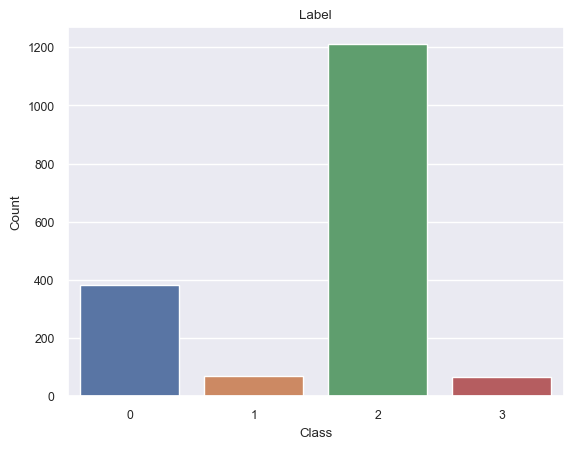

In [22]:
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

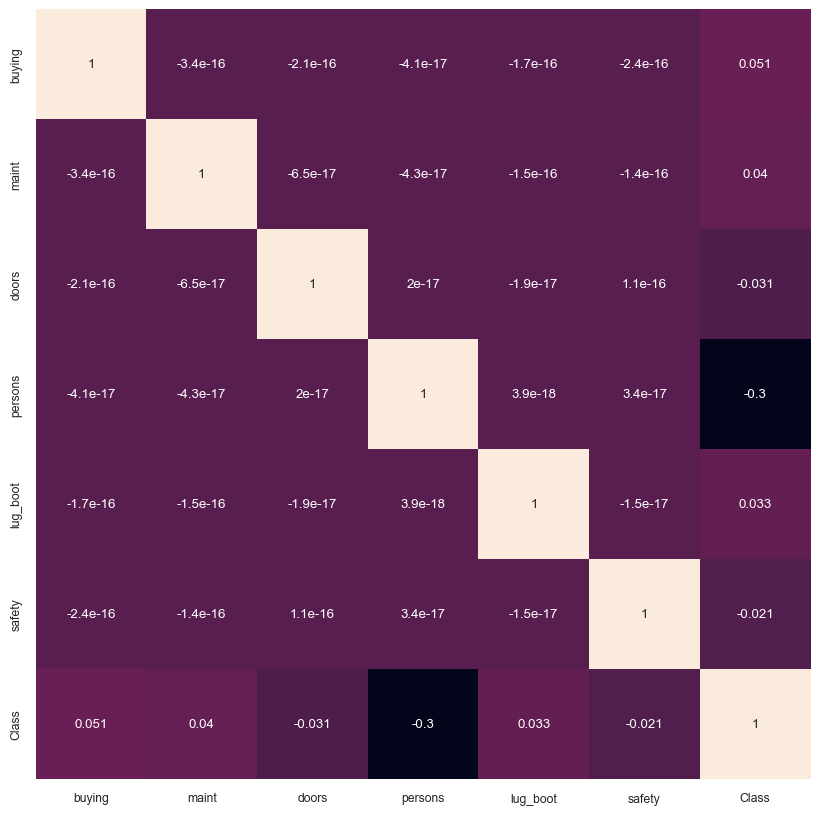

In [14]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [16]:
X = df.iloc[:,0:6].values
y = df.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [17]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [18]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


C:\Users\adminastor\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 0.5803 - accuracy: 0.6664 - val_loss: 0.4922 - val_accuracy: 0.6936
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7019 - val_loss: 0.4232 - val_accuracy: 0.6936
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.7019 - val_loss: 0.3964 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.7019 - val_loss: 0.3842 - val_accuracy: 0.6936
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.7019 - val_loss: 0.3781 - val_accuracy: 0.6936
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.7019 - val_loss: 0.3747 - val_accuracy: 0.6936
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.7019 - val_loss: 0.3733 - val_accuracy: 0.6936
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.7019 - val_loss: 0.3709 - val_accuracy: 0.6936
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.7019 - val_loss: 0.3710 - val_accuracy: 0.6936
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.7019 - val_loss: 0.3712 - val_accuracy: 0.6936
Epoch 62/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.7019 - val_loss: 0.3711 - val_accuracy: 0.6936
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.7019 - val_loss: 0.3710 - val_accuracy: 0.6936
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.7019 - val_loss: 0.3710 - val_accuracy: 0.6936
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.7019 - val_loss: 0.3710 - val_accuracy: 0.6936
Epoch 

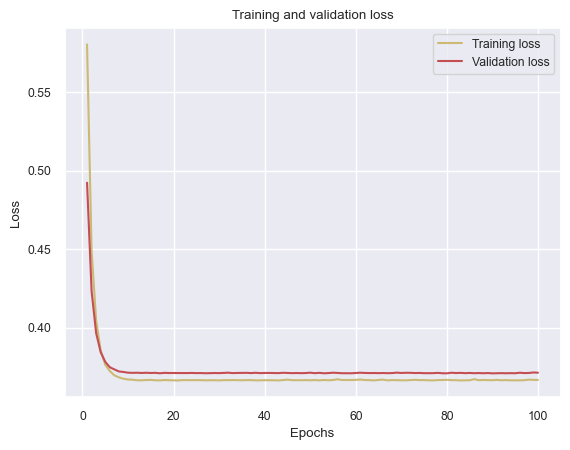

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

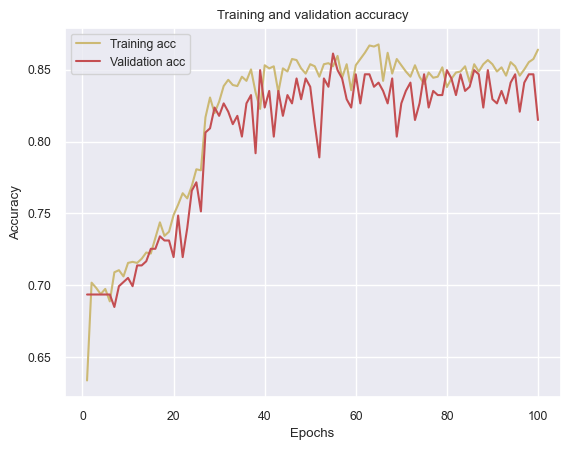

In [56]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        79
           1       0.00      0.00      0.00        17
           2       0.99      0.90      0.94       240
           3       0.26      0.90      0.41        10

    accuracy                           0.82       346
   macro avg       0.47      0.63      0.50       346
weighted avg       0.83      0.82      0.82       346

[[ 58   0   3  18]
 [ 16   0   0   1]
 [ 19   0 215   6]
 [  1   0   0   9]]


C:\Users\adminastor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adminastor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adminastor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
